In [2]:
import googlemaps
import polyline
from datetime import datetime
from matplotlib import pyplot as plt

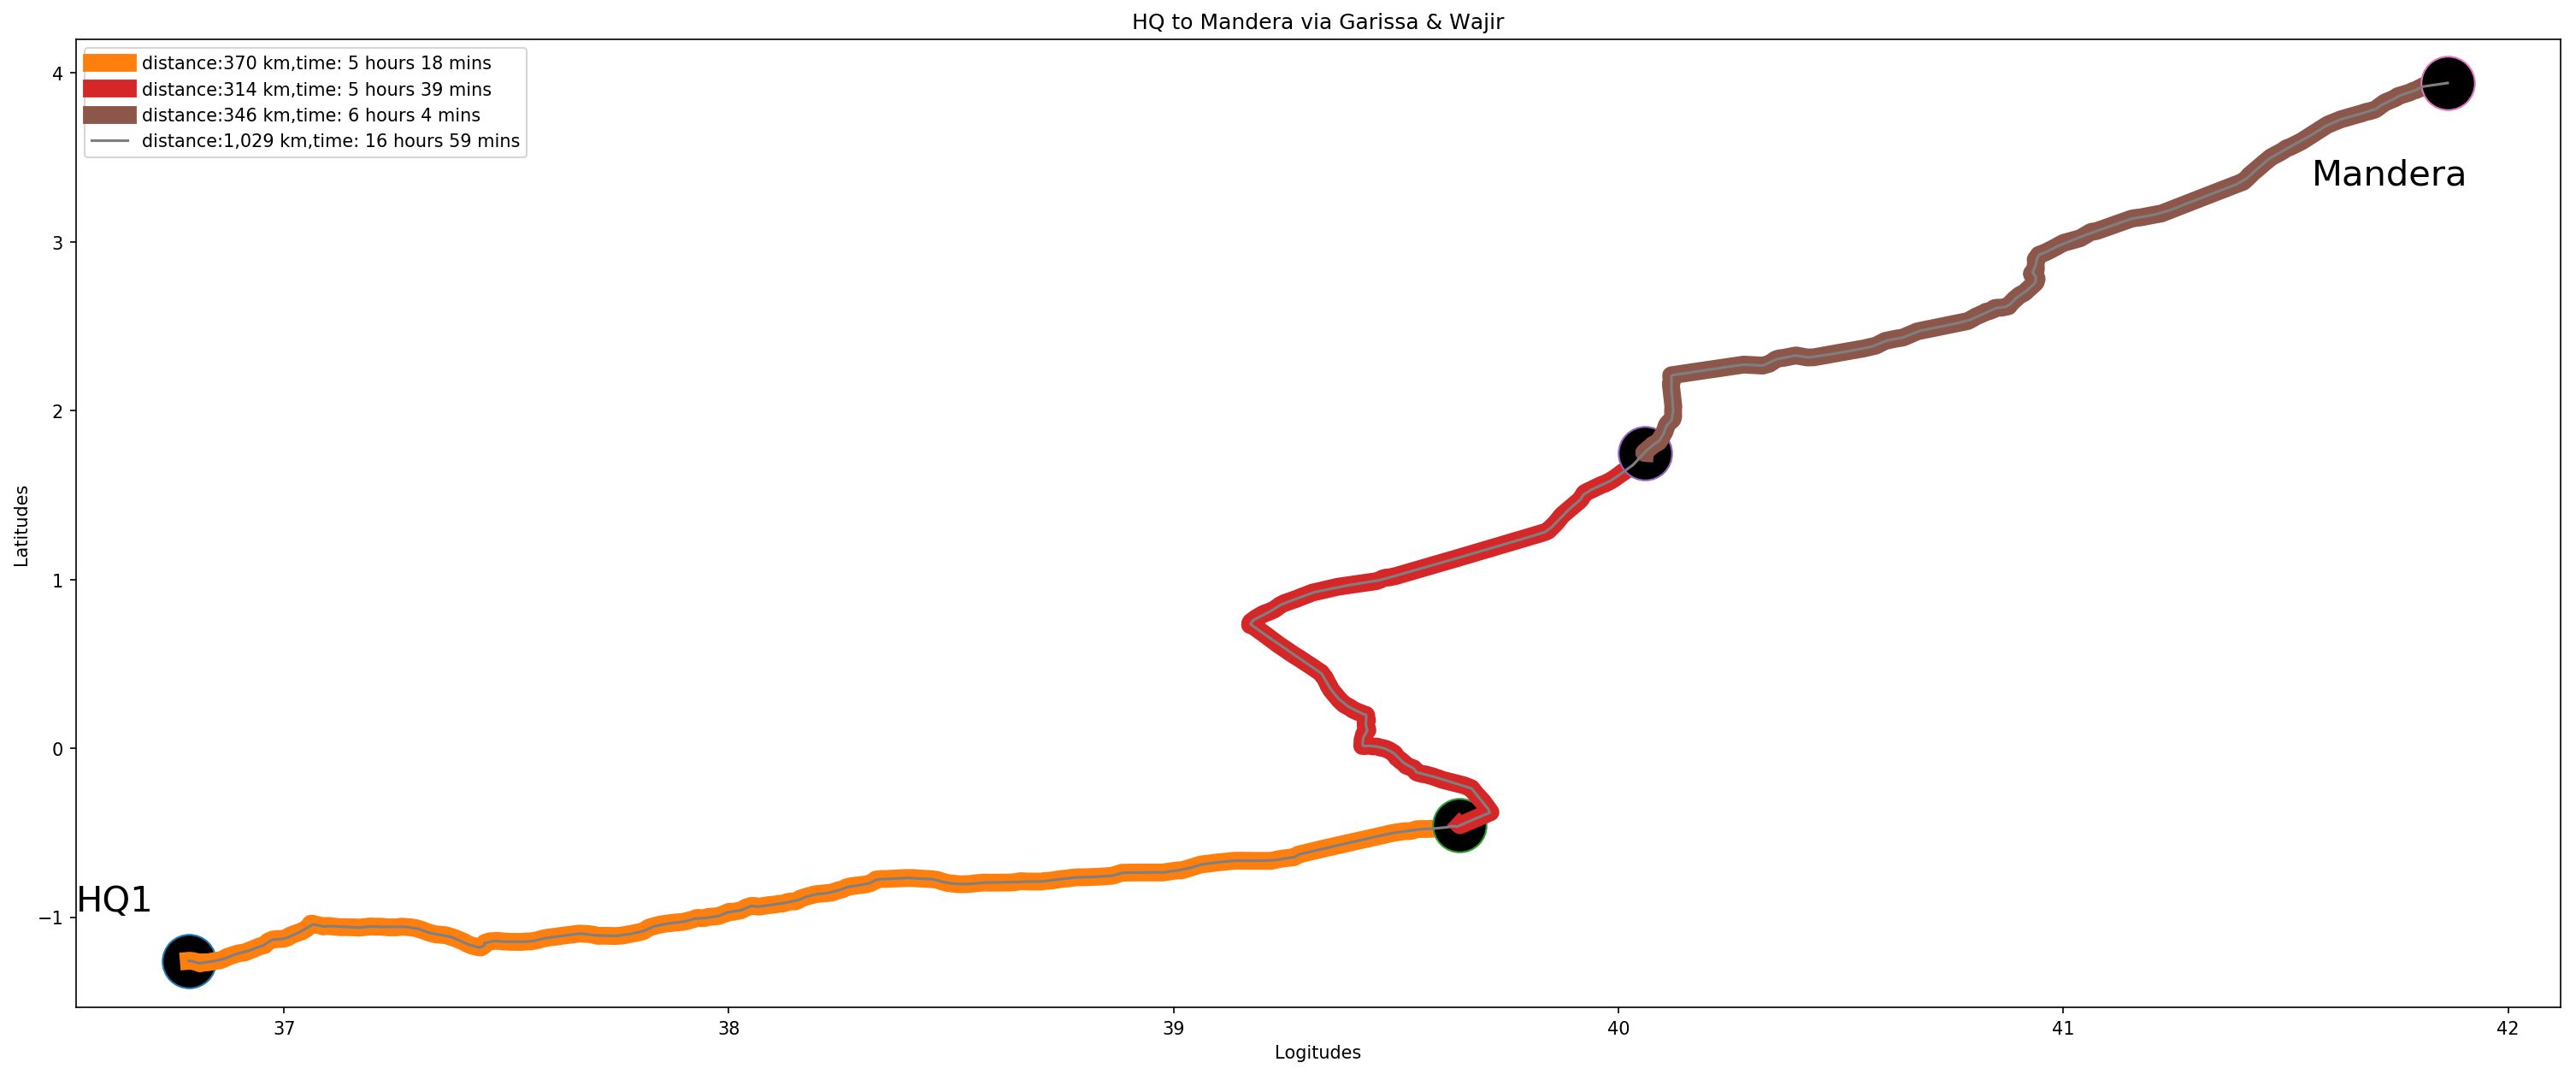

In [75]:
#open file with the API key

with open('apiKey.txt','r') as apiKey:
    gmaps = googlemaps.Client(apiKey.read())
    #HQ to Garissa
    result = gmaps.directions(origin='-1.259027,36.785874',destination='-0.453815,39.642753',mode='driving', departure_time=datetime.now())
    
    # Garissa to Wajir
    result1 = gmaps.directions(origin='-0.453815,39.642753',destination='1.749058547,40.05921749',mode='driving', departure_time=datetime.now())
    
    #Garissa to Mandera
    result2 = gmaps.directions(origin='1.749058547,40.05921749',destination='3.940397,41.863902',mode='driving', departure_time=datetime.now())
    
    
    #Return trip
    result3 = gmaps.directions(origin='3.940397,41.863902',destination='-1.259027,36.785874',mode='driving', departure_time=datetime.now())
    
    #extract the distance,time and decoded coordinates from directions
    dist = result[0]['legs'][0]['distance']['text']
    time = result[0]['legs'][0]['duration']['text']
    line = polyline.decode(result[0]['overview_polyline']['points'])
    
    dist1 = result1[0]['legs'][0]['distance']['text']
    time1 = result1[0]['legs'][0]['duration']['text']
    line1 = polyline.decode(result1[0]['overview_polyline']['points'])
    
    dist2 = result2[0]['legs'][0]['distance']['text']
    time2 = result2[0]['legs'][0]['duration']['text']
    line2 = polyline.decode(result2[0]['overview_polyline']['points'])
    
    dist3 = result3[0]['legs'][0]['distance']['text']
    time3 = result3[0]['legs'][0]['duration']['text']
    line3 = polyline.decode(result3[0]['overview_polyline']['points'])
    
    #invert the coordinates
    xs = [xy[1] for xy in line]
    ys = [xy[0] for xy in line]
    
    xs1 = [xy[1] for xy in line1]
    ys1 = [xy[0] for xy in line1]
    
    xs2 = [xy[1] for xy in line2]
    ys2 = [xy[0] for xy in line2]
    
    xs3 = [xy[1] for xy in line3]
    ys3 = [xy[0] for xy in line3]    
    
    
    plt.figure(figsize=(25,10),dpi=150)
    plt.plot(36.785874,-1.259027, marker='o',markerfacecolor='black',markersize=30)
    plt.annotate('HQ1',(36.785874,-1.259027),xytext=(0,0.1), textcoords='axes fraction',size=20)
    plt.plot(xs,ys,label='distance:{},time: {}'.format(dist,time),linewidth=10)
    plt.plot(39.642753,-0.453815, marker='o',markerfacecolor='black',markersize=30)
    plt.plot(xs1,ys1,label='distance:{},time: {}'.format(dist1,time1),linewidth=10)
    plt.plot(40.05921749,1.749058547, marker='o',markerfacecolor='black',markersize=30)
    plt.plot(xs2,ys2,label='distance:{},time: {}'.format(dist2,time2),linewidth=10)
    plt.plot(41.863902,3.940397, marker='o',markerfacecolor='black',markersize=30)
    plt.annotate('Mandera',(41.863902,3.940397),xytext=(0.9,0.85), textcoords='axes fraction',size=20)
    
    plt.plot(xs3,ys3,label='distance:{},time: {}'.format(dist3,time3)) #return trip
    plt.title("HQ to Mandera via Garissa & Wajir")
    plt.xlabel("Logitudes")
    plt.ylabel("Latitudes")
    plt.legend()
    
    plt.show()
    #plt.savefig('Route.png')

In [42]:

import ast
import geojson

with open('HQ_to_mandera.txt', 'r') as data:

    route = ast.literal_eval(data.read())

    
    #extract overview_polyline
    line=polyline.decode(result3[0]['overview_polyline']['points'])
   
    start, end = line[0], line[-1]
    
    
    crs = {"type":"name", "properties":{'name':'EPSG:4326'}}
    
    
    
    properties = {"name": "Mandera to HQ Care Center", "LengthKM":1029 ,"timeH":'20 hours 6 mins'}
    
    with open('better_route_5.geojson', 'w')  as r:
        routejs = geojson.LineString([(xy[1], xy[0]) for xy in line], crs = crs)
               
        #dump routejs to geojson
        geojson.dump(geojson.Feature(geometry = routejs, properties = properties), r)
    
   
        
